### RADHIKA JOSHI 
### DATA ANALYSIS OF INFLATION INDEX AND CPI RATE ACROSS MULTIPLE COUNTRIES


### DATA COLLECTION AND STORAGE 


#### 1.1 CHOOSE API AND DETAILS
* The API is privided by: https://www.quandl.com/
* Quandl provides financial, economic, and alternative data for investors.
* The API key I was assigned is: __piitRsEcjzi_WxJoQxxU__
* I chose to use the Inflation Rate and CPI index for the following countries: the United States of America, Japan, Canada, Switzerland, and the United Kingdom. 


In [5]:
# import functions required to collect and read data
import os
import urllib.request
import json
import csv
import traceback
import sys
import pandas as pd


In [6]:
api_key = "piitRsEcjzi_WxJoQxxU"

#### 1.2 COLLECTION OF DATA FROM API


In [7]:
import time
#create a file with set headings - Inflation and CPI
def create_file (file_loc, headings): 
    with open(file_loc, "w",newline='') as write_file:  
        f = csv.writer(write_file)
        f.writerow(headings)
    write_file.close()
    
#function to call the API, retreive the raw csv data, and write to a file
def get_and_write_data(link, file_loc, category, country):

    response = urllib.request.urlopen(link)
    html = response.read().decode()
    
    lines = html.strip().split("\n")
    
    dates= []
    values = []
    
    # Function to split the obtained CSV and store the data in the form of multiple columns.
    
    for l in lines:
        if l[0] == "#":
            continue
        elif l[0:10] in ["Not Availa", "There is n"]:
            continue
        else:
            l_line = l.split(",")

            if "Date" in l_line[0]:
                continue
            else:

                dates.append(l_line[0])
                values.append(l_line[1])
                
    
    csv_rd = pd.read_csv(file_loc)
    
    new_column = category + "_" + country

    csv_rd['Date'] = dates
    csv_rd[new_column] = values
    
    csv_rd.to_csv(file_loc, index=False)
    
def get_raw_data(file_loc,api_key,category,country):
    for i in range(len(category)):
        for k in range(len(country)):
            link = "https://www.quandl.com/api/v3/datasets/RATEINF/"+category[i]+"_"+country[k]+"/data.csv?start_date=1990-12-31-&end_date=2017-12-31&api_key=" + api_key   
            get_and_write_data(link, file_loc, category[i], country[k])


In [8]:
# Set variabes to collect raw data
category = ["INFLATION","CPI"]
country = ["USA", "JPN", "CHE", "CAN", "GBR"] # USA = USA; JPN = Japan; CHE = Switzerland; CAN = Canada; GBR = United Kingdom

heading = ["Date"]

raw_file = "Inflation_Index.csv"
create_file(raw_file, heading)

get_raw_data(raw_file, api_key,category,country)
    
print("Raw Data Collection Completed \n") # print line to check execution


Raw Data Collection Completed 



### LOADING AND REPRESENTATION OF DATA 

The data is collected from 31st December 1990 upto 31st December 2017. This data is collected at the end of the month for every year, which is over 300 records of data. The firts 10 rows are displayed below, for ease of reading.The first five columns give the inflation rate of the countries, and the next five give the CPI.


In [112]:


df = pd.read_csv("Inflation_Index.csv")
df = df.sort_values(by=["Date"]) # set the date as the index
df = df.set_index("Date")

display(df.iloc[0:13,:])  # command to display the first 10 rows of csv


,INFLATION_USA,INFLATION_JPN,INFLATION_CHE,INFLATION_CAN,INFLATION_GBR,CPI_USA,CPI_JPN,CPI_CHE,CPI_CAN,CPI_GBR
Date,,,,,,,,,,
1990-12-31,6.106,3.7,5.3,5.0,7.6,133.8,92.6,79.5,79.9,57.4
1991-01-31,5.651,4.0,5.5,6.9,7.1,134.6,93.2,80.1,82.0,57.4
1991-02-28,5.313,3.5,6.2,6.2,7.1,134.8,93.0,80.9,82.0,57.7
1991-03-31,4.895,3.6,5.9,6.2,6.8,135.0,93.4,80.9,82.3,57.9
1991-04-30,4.888,3.5,5.9,6.2,8.5,135.2,94.0,81.1,82.3,59.9
1991-05-31,4.954,3.4,6.3,6.2,8.3,135.6,94.4,81.8,82.7,60.3
1991-06-30,4.696,3.5,6.6,6.3,8.4,136.0,94.1,82.2,83.1,60.6
1991-07-31,4.448,3.5,6.6,6.0,8.4,136.2,94.0,82.2,83.2,60.4
1991-08-31,3.799,3.4,6.0,6.0,7.6,136.6,94.2,82.6,83.3,60.7


In [113]:
# Count number of rows
input_file = open("Inflation_Index.csv","r+")
reader_file = csv.reader(input_file)
value = len(list(reader_file))
print("The total number of rows in file is",value)

# Check for null values
df.isnull().sum()


The total number of rows in file is 326


INFLATION_USA    0
INFLATION_JPN    0
INFLATION_CHE    0
INFLATION_CAN    0
INFLATION_GBR    0
CPI_USA          0
CPI_JPN          0
CPI_CHE          0
CPI_CAN          0
CPI_GBR          0
dtype: int64

### ANALYSIS OF THE DATA 

The data collected from the website gives information about the inflation rate and Consumer Price Index(CPI) of a country. These two measures are important in understanding the economy, power of the currency, purchasing power, and are important measures for investors and traders.
We will use the following graphs to understand the trends in inflation rate and CPI for the countries.

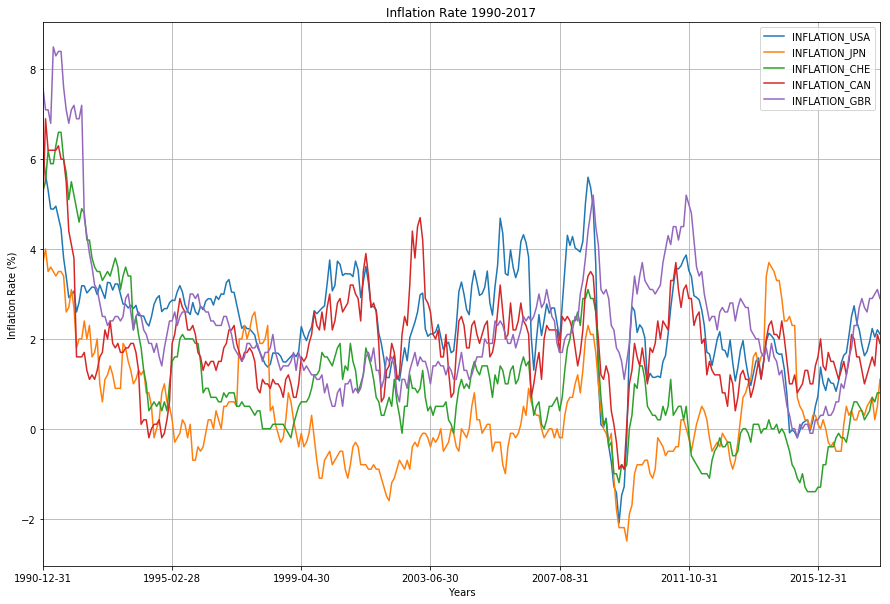

In [114]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df_inflation = df.iloc[:, 0:5]
plt.figure()
df_inflation.plot(figsize=(15, 10), grid=True)
plt.title("Inflation Rate 1990-2017")
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Years")
plt.show()

From the graph above, we see that the inflation rate was highest (at alomst 9% for USA) for all the countries during the early 1990s. This was the time when the world was still recovering from some of the highest inflation rates in the previous decade which had gone as high as 30%. 

This was fuelled by the recession of the 1970s-1980s and the oil price shock in early 1990s. After this hike in the early '90s, it went down by about __4%__ till 1999. All developed countries try to maintain inflation rate between 1% - 3% which is considered to be a good measure of growth.

Similarly, the __negative inflation rate__, or __deflation__ was observed in the peroid of roughly 2007-2009. This coincides with the Financial Crisis which occured from 2007 onwards. We can see that the biggest dip occured in the inflation rate in the USA where it fell from about 6% to -2(%). 

DUring the period till 2007, high inflation correlated with good market conditions. During the financial crisis, however, prices, and hence inflation went down to accomodate for the loss in currency value. 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002109972AB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002109876E588>]], dtype=object)

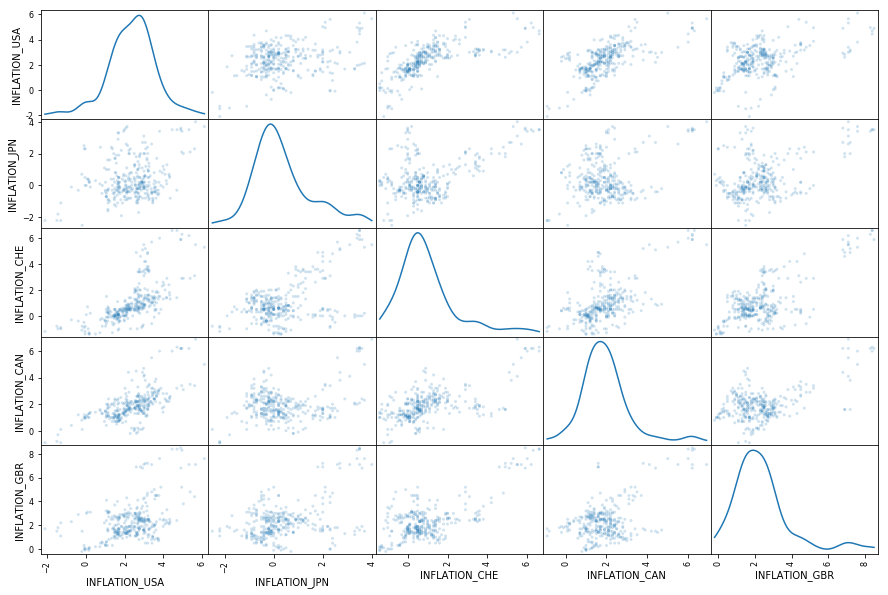

In [115]:
# Scatter matrix to show comparison of Inflation rates
from pandas.plotting import scatter_matrix
scatter_matrix(df_inflation, alpha=0.2, figsize=(15, 10), diagonal='kde')

The graph above shows that while the inflation of all countries has risen over the years, there isn't a strong correlation between the inflation rate of any two countries. This can be attributed to the fact that the inflation rate of a country is dictated by the spending power of the people, and its GDP, which are internal measures. 

Therefore, while the global market and trade does affect the economy of a country,inflation rate is quite uncorrelated to other countries, by virtue of internal measures being a great influence in cslculation of the same.

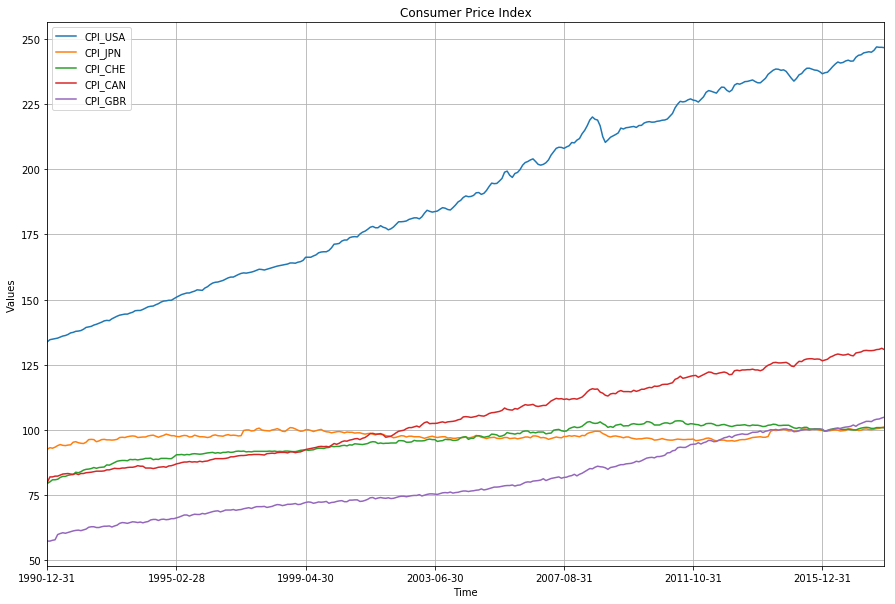

In [117]:
# Plot the Consumer Price Index as a function of time
# Create new data frame which has all the CPI columns

df_CPI = df.iloc[:,5:10]
plt.figure()
df_CPI.plot(figsize=(15, 10), grid=True)
plt.title("Consumer Price Index")
plt.ylabel("Values")
plt.xlabel("Time")
plt.show()

The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living; the __CPI is one of the most frequently used statistics for identifying periods of inflation or deflation.[1]__

The CPI is measured with respect to the prices in 1982-84, which is set to 100.

From the above graph, it can be seen that the CPI for USA has increased drastically to about 250 as compared to other countries. The CPI of Japan is almost unchanged, and infact has remained closest to base value of 100. This indicates that the price of the CPI basket in Japan has been unaffected by the rising or falling trends in inflation, and the government has worked to retain the prices for basic everyday needs over the last three decades. 

Over the last five years, Japan, Switzerland and the United Kingdom have been successful in maintaining the CPI as close to the base CPI as possible. While USA and Canada have seen a rising trend in the same, however, the CPI of Canada is still shoing a rise of just over 25%, as opposed to USA, where the CPI is about 150 times higher than the base value of 100.

CPI gives an indication as to what a regular urban family needs in order to live in a country, and from the data above, we can colclude that it is more expensive to live in USA than in any of the other countries in the data.(Here, all countries are developed with a strong currency, and the measure of comparison is only CPI and inflation. Of course, other factors such as the location, government, active wars etc. also play a big role in these decisions, but, since these economies are similar, we will consider the results based on inflation and CPI alone)

This conclusion can be drawn from the fact that CPI includes medical care, which is free, or universal( and regulated) in all countries with the exception of the USA, and can be a major reason for the hike in CPI of the USA, specially in the recent years.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002297249DC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022970A1C780>]], dtype=object)

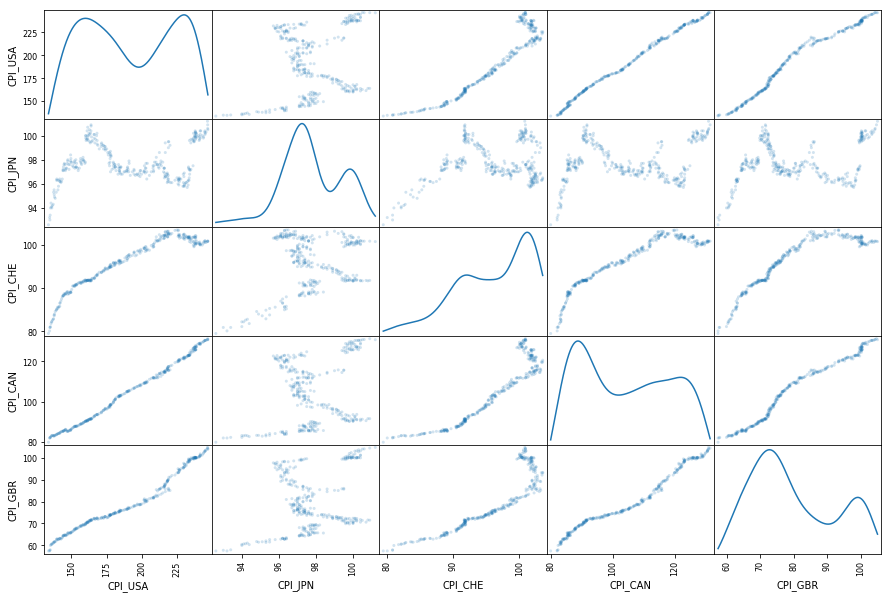

In [109]:
scatter_matrix(df_CPI, alpha=0.2, figsize=(15, 10), diagonal='kde')

__The CPI of different countries is not a comparative measure.__ However, the scatter matrix above shows a linear correlation between the CPIs. Leaving Japan, all coutries show correlation.

Inflation causes the price of commodities to escalate. At the same time, the economy of the country, and its people has also affected. This in turn results in a higher purchasing power, resulting in increased CPI over the years.

The countries studied in this data are all developed, and have similar basic components in the CPI "basket", thus showing strong correlation in CPI index. It also relates to the rising trend of CPI for all the countries(exception Japan).

The correlation can hint towards two possibilities. Firstly, the CPI basket for the countries is similar, and hence the same trend is observed for the elements in its basket; and secondly, it shows that over the years, all of them have shown a rising trend. This can also explain the difference in Japan, where CPI has remained quite unchanged.


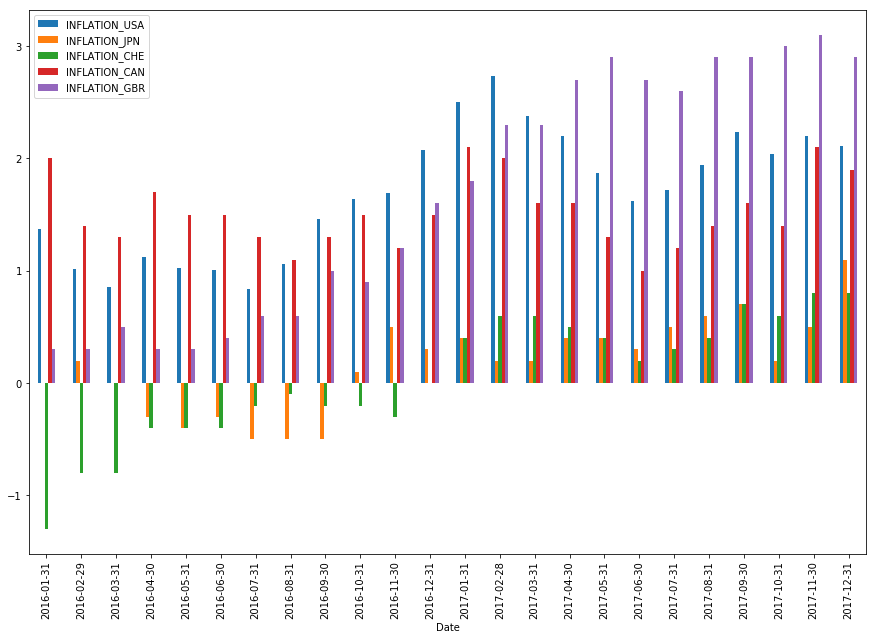

In [118]:
# bar graph for last 2 years, ie 2016 to 2017
df_inflation_index = df.iloc[301:326,0:5]
plt.figure()
df_inflation_index.plot(kind='bar',figsize=(15, 10), grid=False,subplots = False)
plt.show()

The graph above shows the relative changes in inflation for all countries in the last 2 years. We can see that for a good part of 2016, Japan showed deflating trend, which means that it tried to curb down inflation rates. Since Japan has maintained an almost stable CPI rate, high inflation would result in crumbling of the economy, which is why it is prudent for Japan to keep inflation to a bare minimum. 

The highest rates of inflation in the last year,i.e. 2017,  were seen in the UK is linked to Brexit and the uncertainity of that decision( with which it coincides)

For investors, this will be a great point of scrutiny when it comes to the inverstment market of UK. 

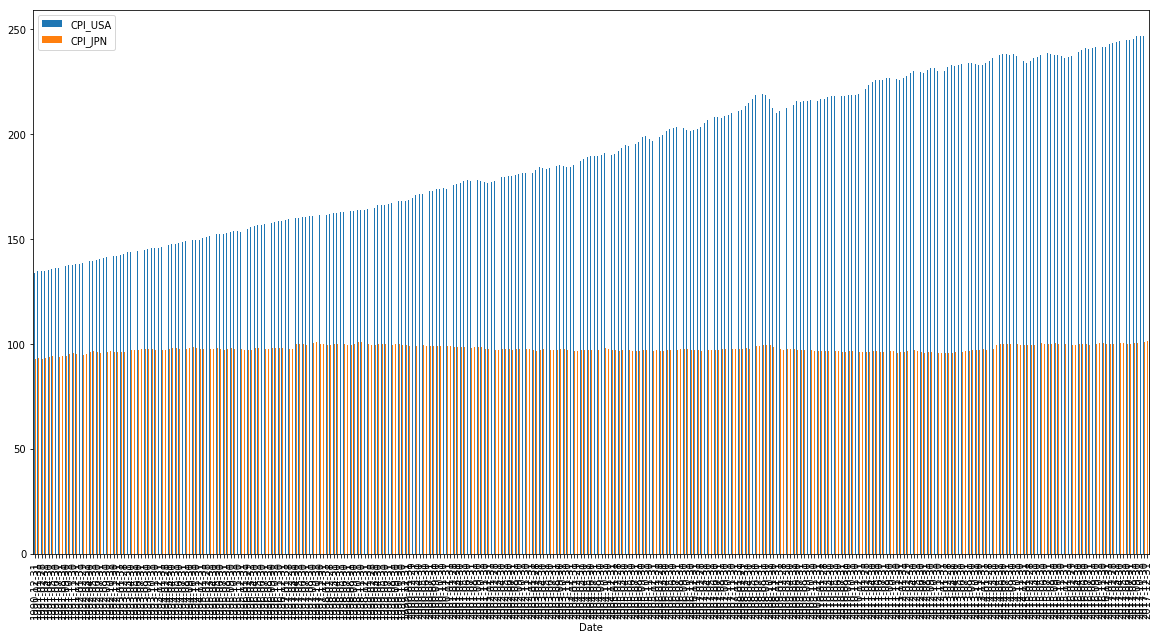

In [119]:
# bar graph for last 5 years, ie 2012 to 2017
df_cpi_index = df.iloc[:,[5,6]]
plt.figure()
df_cpi_index.plot(kind="bar",figsize=(20, 10), grid=False,subplots = False)
plt.show()



With the graph above, I wish to draw out on the fact as to how unchanged is Japan's CPI in comparison with any country. From the year of 1990, upto December 2017, Japan's CPI is unchanged, and closest to the base CPI value of 100. In comparison to that, the CPI of any country, for example, USA, as taken here, has increased upto 150 times the base value in all these years.

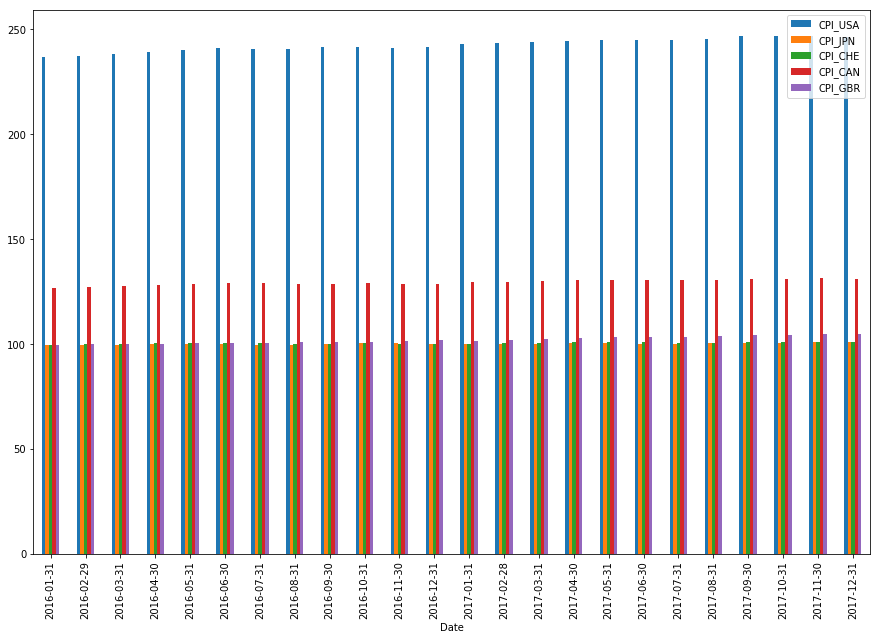

In [120]:
# bar graph for last 2 years, ie 2016 to 2017
df_cpi_index = df.iloc[301:326,5:10]
plt.figure()
df_cpi_index.plot(kind="bar",figsize=(15, 10), grid=False,subplots = False)
plt.show()

The figure above shows the CPI for the last 2 years, where we see that leaving USA and Canada, the countries have maintained their CPI values at base. As opposed to this, in the graph below, which takes the first two years into account, we see that CPI indicates that just at 60% of the value of the base CPI, from just a decade ago, people were able ot live in an urban setting in UK, and it was relatively chepaer to stay in Canada,Switzerland and UK in 1990 as compared to in 1980s, with CPI basket price lower than the base price. 

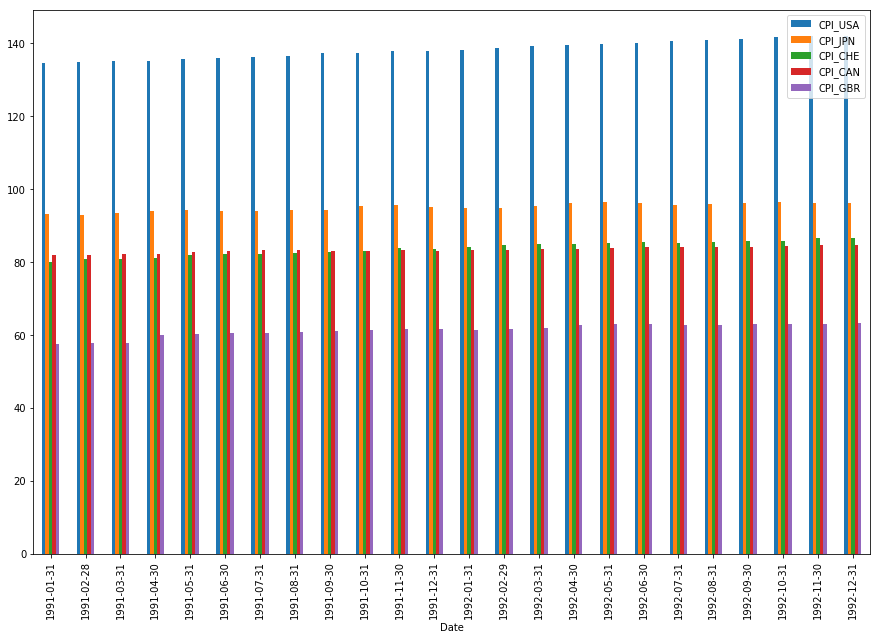

In [121]:
# bar graph for the years,1991 to 1992
df_cpi_index = df.iloc[1:25,5:10]
plt.figure()
df_cpi_index.plot(kind="bar",figsize=(15, 10), grid=False,subplots = False)
plt.show()

### CONCLUSION 

* All the countries are trying to maintain an inflation rate of about 3% for the last few years, as this is a good rate of growth.
* While the CPI of all the countries appears to be linearly increasing, this can be attributed to increase in the earning capacity of the     population as well, and cannot necessarily be a measure of price hike.
* The current inflation trend shows that unless a major crisis or surprise hits the world( eg war, epidemic etc) a sudden inflation rise or fall will not be seen in the near future, and while it will have an upward curve, the rise will be stable and slow.
* Correlation in CPI data can give insight into cost of living in a country, as compared to a person's home country.
* Both inflation rate and CPI are used by investors while deciding which country or business to invest in.
* The data in this is for developed economies, which are quite independent of one another. However, a comparison of developed to developing and under developed nations can show more insight into how the inflation of a developed economy affects that of the developing and under developed nations, especially those that are closely involved with the given nations.




### CITATION 

* https://www.investopedia.com/terms/c/consumerpriceindex.asp